In [105]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, Conv1D
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

3


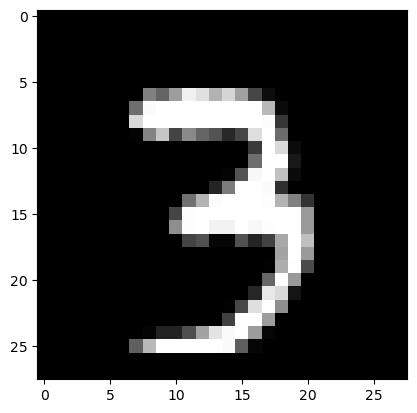

In [106]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[2917], cmap='gray')
print(y_train[2917])

In [107]:
X_train = np.reshape(X_train, (X_train.shape[0], 28, 28, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 28, 28, 1))

num_classes = 10
input_shape = (28, 28, 1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

In [108]:
def create_nn(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, 
                  optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, 
              batch_size=4000, 
              epochs=100, 
              verbose=1, 
              validation_data=(x_test, y_test),
              validation_split=0.1)
    print("finished training model")
    score = model.evaluate(x_test, y_test, verbose=2)
    print(f"loss: {score[0]}")
    print(f"accuracy: {score[1]}")
    return model, history


In [109]:
nn, history = create_nn(X_train, y_train, X_test, y_test)

Epoch 1/100
15/15 [==============================] - 14s 879ms/step - loss: 2.3072 - accuracy: 0.0626 - val_loss: 2.3066 - val_accuracy: 0.0552
Epoch 2/100
15/15 [==============================] - 12s 831ms/step - loss: 2.3052 - accuracy: 0.0683 - val_loss: 2.3042 - val_accuracy: 0.0593
Epoch 3/100
15/15 [==============================] - 12s 807ms/step - loss: 2.3028 - accuracy: 0.0713 - val_loss: 2.3018 - val_accuracy: 0.0654
Epoch 4/100
15/15 [==============================] - 12s 795ms/step - loss: 2.3005 - accuracy: 0.0755 - val_loss: 2.2994 - val_accuracy: 0.0710
Epoch 5/100
15/15 [==============================] - 12s 789ms/step - loss: 2.2980 - accuracy: 0.0818 - val_loss: 2.2970 - val_accuracy: 0.0772
Epoch 6/100
15/15 [==============================] - 12s 806ms/step - loss: 2.2957 - accuracy: 0.0875 - val_loss: 2.2945 - val_accuracy: 0.0841
Epoch 7/100
15/15 [==============================] - 12s 815ms/step - loss: 2.2931 - accuracy: 0.0930 - val_loss: 2.2920 - val_accuracy:

In [113]:
prediction = nn.predict(X_test)

313/313 [==============================] - 6s 21ms/step


prediction: 3, confidence: 0.21921226382255554


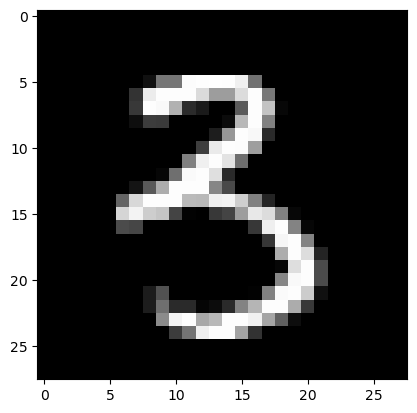

In [114]:
sample = 5000
plt.imshow(X_test[sample], cmap='gray')
print(f"prediction: {np.argmax(prediction[sample])}, confidence: {max(prediction[sample])}")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


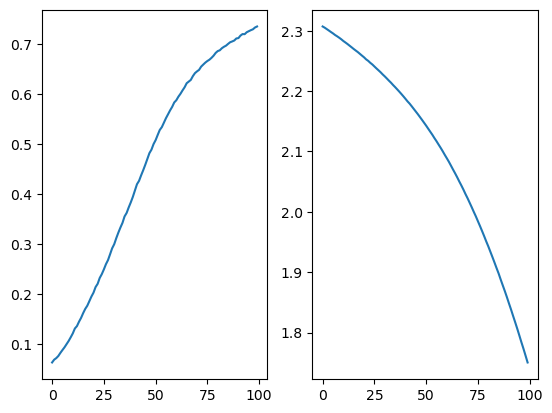

In [137]:
print(history.history.keys())
plt.subplot(1, 2, 1).plot(history.history['accuracy'])
plt.subplot(1, 2, 2).plot(history.history['loss'])

# Exercise 2